#**Housing Price Prediction: Comparison of Linear Regression, KNN, and Decision Tree**
#
In this study, housing prices are predicted using the given housing dataset. Within the scope of the study, three supervised learning algorithms were evaluated:
#
- Linear Regression
- K-Nearest Neighbors (KNN) Regression
- Decision Tree Regression
#
The objective of this analysis is to examine the relationship between housing prices and property features, and to compare the predictive performance of linear, distance-based, and tree-based regression models.



In [1]:
import sys
print(sys.executable)

import pandas as pd
print("pandas:", pd.__version__)

/Users/leyla/Desktop/Housing_Price_Prediction-Data_Analysis/.venv/bin/python
pandas: 3.0.1


In [4]:
import pandas as pd
df = pd.read_csv("housing_full.csv")

In [5]:

print("Data Size:", df.shape)
print("\nfirst 5 rows:")
display(df.head())

print("\nData types and missing value information:")
print(df.info())

Data Size: (20000, 27)

first 5 rows:


,listing_id,neighborhood,building_type,condition,energy_rating,area_sqm,balcony_area_sqm,lot_size_sqm,bedrooms,bathrooms,...,distance_park_km,distance_center_km,noise_level_db,air_quality_index,monthly_hoa_fee,age_years,listing_year,description_length,rooms_total,price
0,10651,Atasehir,apartment,excellent,B,99.6,NaN,0.0,1,2,...,0.59,1.54,NaN,NaN,NaN,54,2024,277,3,201040
1,2042,Sisli,duplex,fair,C,96.9,0.0,27.6,6,4,...,1.83,0.69,60.1,90.0,233.0,22,2024,316,7,267167
2,8669,Umraniye,apartment,good,B,106.5,17.1,0.0,4,2,...,1.55,4.61,46.2,66.0,74.0,5,2023,238,6,144849
3,1115,Bakirkoy,duplex,good,B,108.9,2.7,142.2,6,1,...,0.82,0.66,NaN,94.0,153.0,46,2024,252,7,244100
4,13903,Besiktas,apartment,excellent,B,143.3,2.1,NaN,3,1,...,1.71,2.44,53.2,128.0,334.0,48,2024,113,5,468020



Data types and missing value information:
<class 'pandas.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          20000 non-null  int64  
 1   neighborhood        20000 non-null  str    
 2   building_type       20000 non-null  str    
 3   condition           20000 non-null  str    
 4   energy_rating       19387 non-null  str    
 5   area_sqm            20000 non-null  float64
 6   balcony_area_sqm    15001 non-null  float64
 7   lot_size_sqm        13020 non-null  float64
 8   bedrooms            20000 non-null  int64  
 9   bathrooms           20000 non-null  int64  
 10  living_rooms        20000 non-null  int64  
 11  floor               20000 non-null  int64  
 12  has_elevator        20000 non-null  int64  
 13  has_parking         20000 non-null  int64  
 14  has_ac              20000 non-null  int64  
 15  has_sea_view        2

###**LIBRARIES**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

###**Descriptive Analysis**

**Correlation Analysis**

A correlation matrix was computed to examine the relationships among numerical variables. In particular, the variables with the highest correlation with the dependent variable, price, were identified. This analysis provides insight into which variables may be more influential during the modeling stage. The heatmap visualization presents the overall structure of linear relationships between variables.

In [7]:
corr_matrix = df.corr(numeric_only=True)

corr_target = corr_matrix["price"].sort_values(ascending=False)
print("Variables with the highest correlation with Price:")
display(corr_target.head(10))

Variables with the highest correlation with Price:


price           1.000000
area_sqm        0.690528
has_sea_view    0.223716
floor           0.065401
bathrooms       0.062063
bedrooms        0.057276
lot_size_sqm    0.055419
rooms_total     0.055027
has_elevator    0.039304
has_parking     0.039182
Name: price, dtype: float64

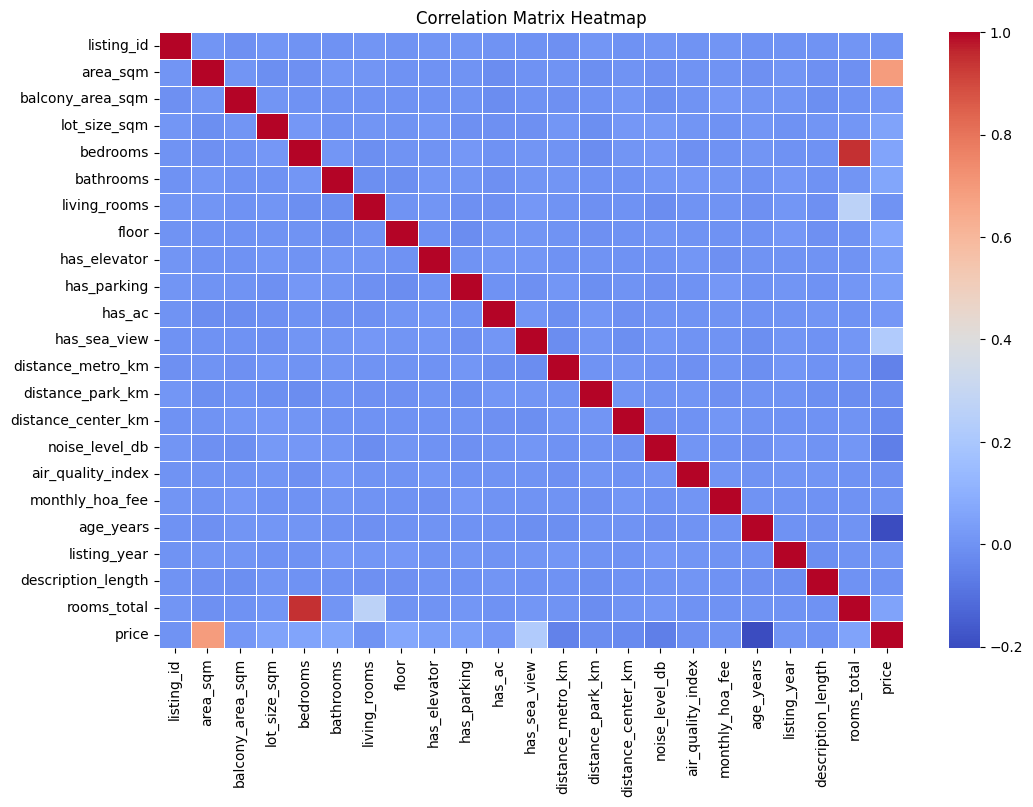

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

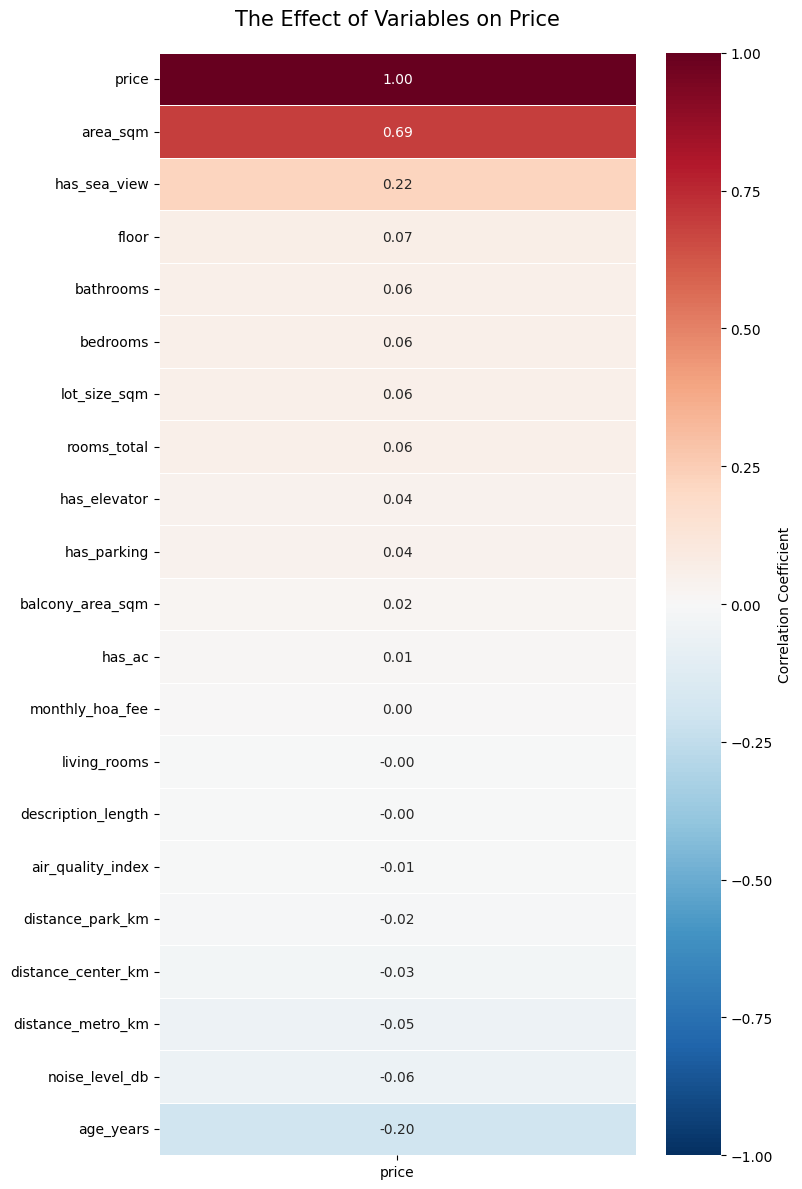

In [9]:
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['listing_id', 'listing_year'], errors='ignore')

corr_matrix = numeric_df.corr()

price_corr = corr_matrix[['price']].sort_values(by='price', ascending=False)

plt.figure(figsize=(8, 12))

sns.heatmap(
    price_corr,
    annot=True,
    fmt=".2f",
    cmap='RdBu_r',
    vmin=-1, vmax=1,
    center=0,
    linewidths=.5,
    cbar_kws={"label": "Correlation Coefficient"}
)

plt.title('The Effect of Variables on Price', fontsize=15, pad=20)
plt.tight_layout()
plt.savefig('price_focus_heatmap.png')
plt.show()

/var/folders/z5/v4jnxwv942g3tzxjmg281l6m0000gn/T/ipykernel_48582/3215157005.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


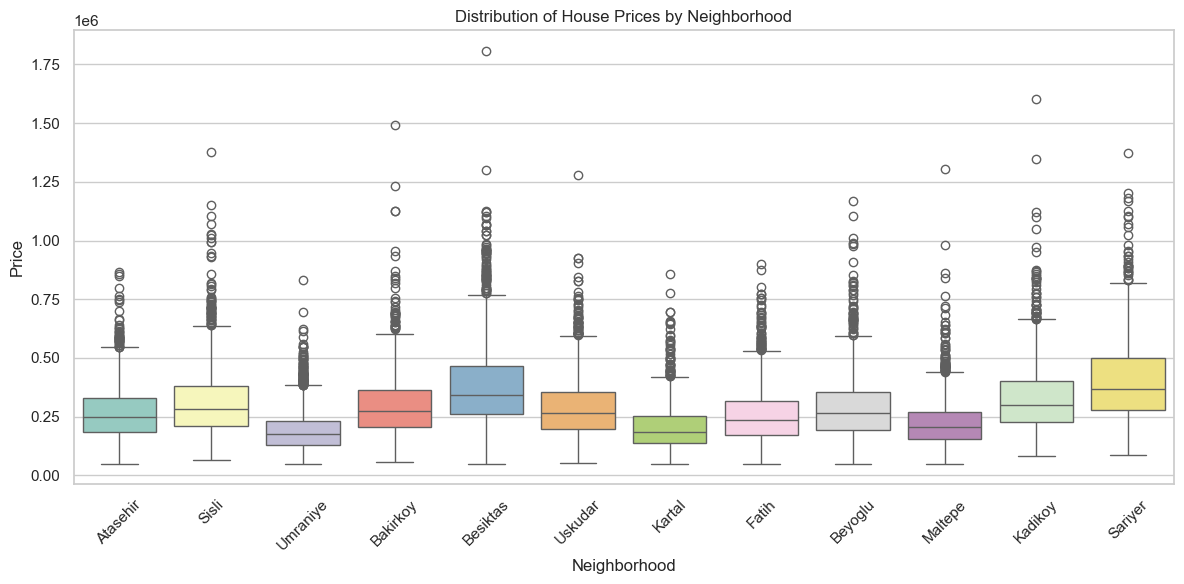

In [10]:
sns.set(style="whitegrid")


plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x="neighborhood",
    y="price",
    palette="Set3",
    showfliers=True
)

plt.title("Distribution of House Prices by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/z5/v4jnxwv942g3tzxjmg281l6m0000gn/T/ipykernel_48582/1245348089.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


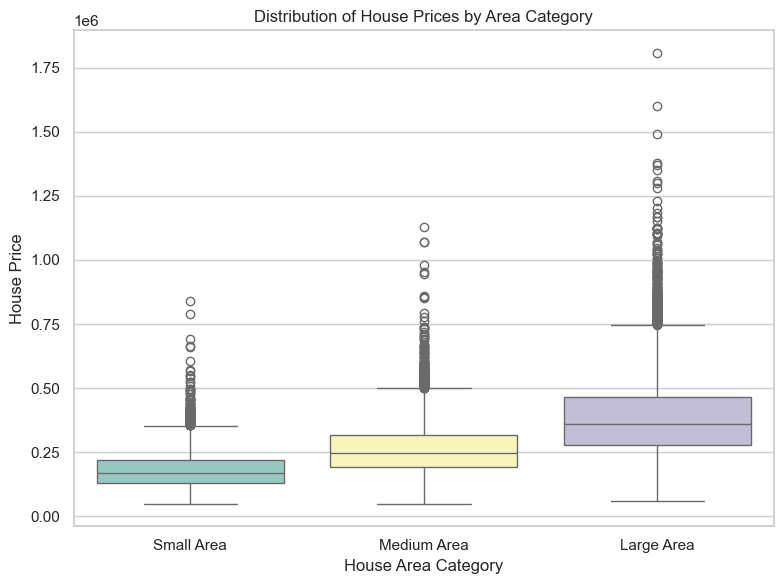

In [11]:

df["area_category"] = pd.qcut(
    df["area_sqm"],
    q=3,
    labels=["Small Area", "Medium Area", "Large Area"]
)


plt.figure(figsize=(8, 6))
sns.boxplot(
    x="area_category",
    y="price",
    data=df,
    palette="Set3"
)


plt.title("Distribution of House Prices by Area Category")
plt.xlabel("House Area Category")
plt.ylabel("House Price")

plt.tight_layout()
plt.show()

/var/folders/z5/v4jnxwv942g3tzxjmg281l6m0000gn/T/ipykernel_48582/3279344711.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


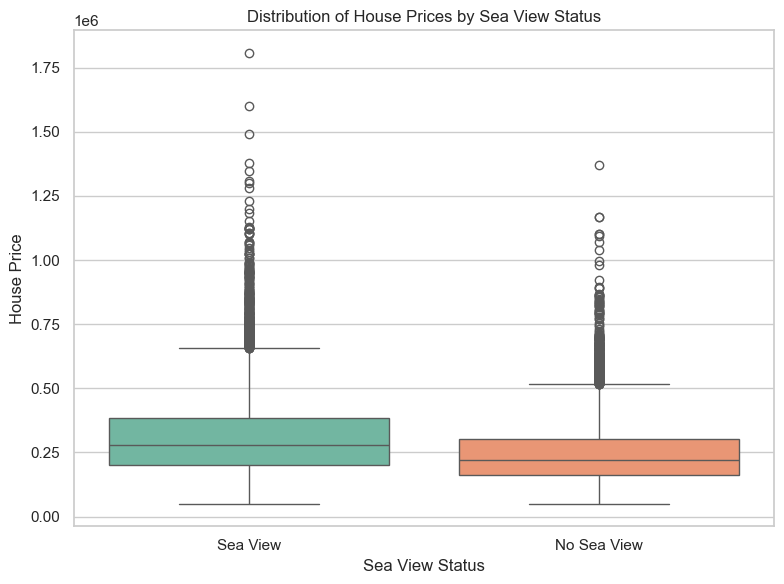

In [12]:

df["sea_view_label"] = df["has_sea_view"].map({0: "No Sea View", 1: "Sea View"})


plt.figure(figsize=(8, 6))
sns.boxplot(
    x="sea_view_label",
    y="price",
    data=df,
    palette="Set2"
)

plt.title("Distribution of House Prices by Sea View Status")
plt.xlabel("Sea View Status")
plt.ylabel("House Price")

plt.tight_layout()
plt.show()


## **Data Preprocessing and Missing Value Management**


To improve model performance and ensure that the algorithms can process the data correctly, the following preprocessing steps were applied:

Missing Value Imputation:

- Missing values in numerical variables were filled with the column mean.

- Missing values in categorical variables were filled with the most frequent value in the column.

**Transformation of Categorical Variables:**

To enable machine learning models to process the data, categorical features such as neighborhood and building_type were converted into numerical format using the One-Hot Encoding method.

**Scaling:**

To prevent variables with different scales from negatively affecting the model, all numerical features were standardized using StandardScaler.

In [13]:
target_col = "price"
y = df[target_col]

X = df.drop(columns=[target_col, "listing_id"])

In [14]:
missing = X.isnull().mean().sort_values(ascending=False)
print("Missing value rates:")
print(missing[missing > 0])

Missing value rates:
lot_size_sqm         0.34900
balcony_area_sqm     0.24995
monthly_hoa_fee      0.12000
air_quality_index    0.10285
noise_level_db       0.07890
distance_metro_km    0.04940
distance_park_km     0.04890
energy_rating        0.03065
dtype: float64


In [15]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric variables:", num_features)
print("Categorical variables:", cat_features)

Numeric variables: ['area_sqm', 'balcony_area_sqm', 'lot_size_sqm', 'bedrooms', 'bathrooms', 'living_rooms', 'floor', 'has_elevator', 'has_parking', 'has_ac', 'has_sea_view', 'distance_metro_km', 'distance_park_km', 'distance_center_km', 'noise_level_db', 'air_quality_index', 'monthly_hoa_fee', 'age_years', 'listing_year', 'description_length', 'rooms_total']
Categorical variables: ['neighborhood', 'building_type', 'condition', 'energy_rating', 'sea_view_label']


/var/folders/z5/v4jnxwv942g3tzxjmg281l6m0000gn/T/ipykernel_48582/2365390217.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_features = X.select_dtypes(include=["object"]).columns.tolist()


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)


## **Training and Test Set Split**

To evaluate model performance, the dataset was split into training and test sets.
Eighty percent of the data was used for training, while 20% was reserved for testing.
This approach allows the model’s predictive performance to be measured on previously unseen data.


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (16000, 27) (16000,)
Test set: (4000, 27) (4000,)


## **One Hot Coding**

In [18]:
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numerical_cols = X.select_dtypes(exclude=["object", "category"]).columns

print("Categorical columns:", categorical_cols.tolist())
print("Numeric columns:", numerical_cols.tolist())

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

X_train_encoded = pd.DataFrame(X_train_encoded,
                               index=X_train.index,
                               columns=encoder.get_feature_names_out(categorical_cols))

X_test_encoded = pd.DataFrame(X_test_encoded,
                              index=X_test.index,
                              columns=encoder.get_feature_names_out(categorical_cols))

X_train_final = pd.concat([X_train[numerical_cols], X_train_encoded], axis=1)
X_test_final = pd.concat([X_test[numerical_cols], X_test_encoded], axis=1)

print("Final Train Shape:", X_train_final.shape)
print("Final Test Shape:", X_test_final.shape)

Categorical columns: ['neighborhood', 'building_type', 'condition', 'energy_rating', 'area_category', 'sea_view_label']
Numeric columns: ['area_sqm', 'balcony_area_sqm', 'lot_size_sqm', 'bedrooms', 'bathrooms', 'living_rooms', 'floor', 'has_elevator', 'has_parking', 'has_ac', 'has_sea_view', 'distance_metro_km', 'distance_park_km', 'distance_center_km', 'noise_level_db', 'air_quality_index', 'monthly_hoa_fee', 'age_years', 'listing_year', 'description_length', 'rooms_total']
Final Train Shape: (16000, 52)
Final Test Shape: (4000, 52)


/var/folders/z5/v4jnxwv942g3tzxjmg281l6m0000gn/T/ipykernel_48582/125762314.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = X.select_dtypes(include=["object", "category"]).columns


In [19]:
print("Number of missing values (train):")
print(X_train_final.isnull().sum().sum())
print("Number of missing values (test):")
print(X_test_final.isnull().sum().sum())

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

X_train_final = pd.DataFrame(imputer.fit_transform(X_train_final),
                             columns=X_train_final.columns,
                             index=X_train_final.index)

X_test_final = pd.DataFrame(imputer.transform(X_test_final),
                            columns=X_test_final.columns,
                            index=X_test_final.index)

print("After missing value (train):", X_train_final.isnull().sum().sum())
print("After missing value (test):", X_test_final.isnull().sum().sum())

Number of missing values (train):
16105
Number of missing values (test):
3875
After missing value (train): 0
After missing value (test): 0


**FEATURE SELECTION - BACKWARD ELIMINATION (RFE)**

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


base_estimator = LinearRegression()


rfe = RFE(estimator=base_estimator, n_features_to_select=10)
rfe.fit(X_train_final, y_train)


selected_features = X_train_final.columns[rfe.support_].tolist()

X_train_sel = X_train_final[selected_features]
X_test_sel = X_test_final[selected_features]

print("Selected features after Backward Elimination (RFE):")
for f in selected_features:
    print("-", f)

print("\nNew shapes:")
print("X_train_sel:", X_train_sel.shape)
print("X_test_sel:", X_test_sel.shape)


Selected features after Backward Elimination (RFE):
- neighborhood_Besiktas
- neighborhood_Fatih
- neighborhood_Kartal
- neighborhood_Maltepe
- neighborhood_Sariyer
- neighborhood_Umraniye
- building_type_apartment
- condition_excellent
- area_category_Small Area
- sea_view_label_No Sea View

New shapes:
X_train_sel: (16000, 10)
X_test_sel: (4000, 10)


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


target_col = "price"
y = df[target_col]
X = df.drop(columns=[target_col, "listing_id"])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numerical_cols = X.select_dtypes(exclude=["object", "category"]).columns


encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

X_train_encoded = pd.DataFrame(X_train_encoded,
                               index=X_train.index,
                               columns=encoder.get_feature_names_out(categorical_cols))

X_test_encoded = pd.DataFrame(X_test_encoded,
                              index=X_test.index,
                              columns=encoder.get_feature_names_out(categorical_cols))

X_train_final = pd.concat([X_train[numerical_cols], X_train_encoded], axis=1)
X_test_final = pd.concat([X_test[numerical_cols], X_test_encoded], axis=1)


imputer = SimpleImputer(strategy="mean")

X_train_final = pd.DataFrame(imputer.fit_transform(X_train_final),
                             columns=X_train_final.columns,
                             index=X_train_final.index)

X_test_final = pd.DataFrame(imputer.transform(X_test_final),
                            columns=X_test_final.columns,
                            index=X_test_final.index)

print("Preprocessing steps completed. X_train_final and X_test_final are now defined.")

Preprocessing steps completed. X_train_final and X_test_final are now defined.


/var/folders/z5/v4jnxwv942g3tzxjmg281l6m0000gn/T/ipykernel_48582/2959589488.py:17: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = X.select_dtypes(include=["object", "category"]).columns


## **Model Setup**

Three different regression models were built:

- **Linear Regression**: A basic linear approach used as a baseline model.

- **K-Nearest Neighbors (KNN) Regression**: A distance-based method that predicts housing prices based on the average of the most similar data points.

- **Decision Tree Regression**: A tree-based model that captures non-linear relationships by recursively splitting the data into feature-based segments.

For each model, appropriate preprocessing steps were applied to ensure fair and consistent model evaluation.


###**Linear Regression**

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear = LinearRegression()
linear.fit(X_train_final, y_train)

y_train_pred = linear.predict(X_train_final)
y_test_pred = linear.predict(X_test_final)

print("Linear Regression")
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

Linear Regression
Train MSE: 3785276989.0383244
Train R²: 0.8176553905012351
Test MSE: 4196166699.8743362
Test R²: 0.8060482993287493


### **Linear Regression: Actual vs Predicted Prices**

This visualization compares the actual housing prices with the values predicted by the Linear Regression model.
It is used to assess how well the model captures the overall linear relationship between the input features and housing prices.


Linear Regression Results:
Train MSE: 3785276989.0383244
Train R²: 0.8176553905012351
Test MSE: 4196166699.8743362
Test R²: 0.8060482993287493


/var/folders/z5/v4jnxwv942g3tzxjmg281l6m0000gn/T/ipykernel_48582/2622344914.py:20: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = X.select_dtypes(include=["object", "category"]).columns


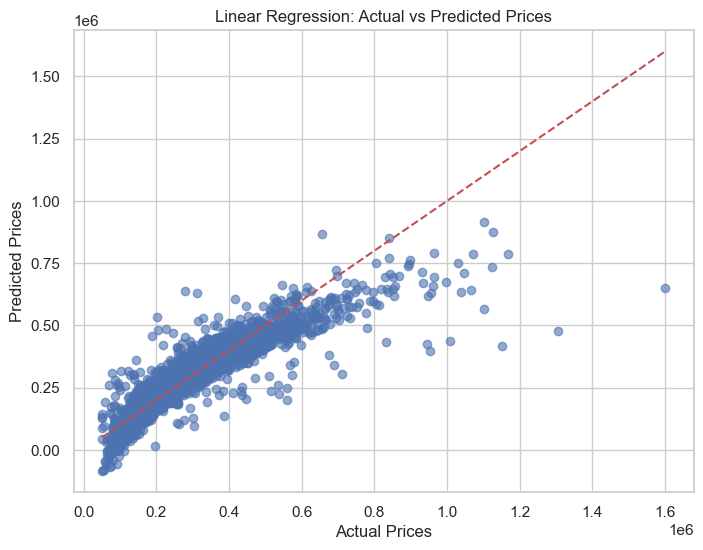

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

target_col = "price"
y = df[target_col]
X = df.drop(columns=[target_col, "listing_id"])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numerical_cols = X.select_dtypes(exclude=["object", "category"]).columns

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

X_train_encoded = pd.DataFrame(X_train_encoded,
                               index=X_train.index,
                               columns=encoder.get_feature_names_out(categorical_cols))

X_test_encoded = pd.DataFrame(X_test_encoded,
                              index=X_test.index,
                              columns=encoder.get_feature_names_out(categorical_cols))

X_train_final = pd.concat([X_train[numerical_cols], X_train_encoded], axis=1)
X_test_final = pd.concat([X_test[numerical_cols], X_test_encoded], axis=1)

imputer = SimpleImputer(strategy="mean")

X_train_final = pd.DataFrame(imputer.fit_transform(X_train_final),
                             columns=X_train_final.columns,
                             index=X_train_final.index)

X_test_final = pd.DataFrame(imputer.transform(X_test_final),
                            columns=X_test_final.columns,
                            index=X_test_final.index)


linear = LinearRegression()
linear.fit(X_train_final, y_train)

y_train_pred = linear.predict(X_train_final)
y_test_pred = linear.predict(X_test_final)

print("Linear Regression Results:")
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R²:", r2_score(y_test, y_test_pred))


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--'
)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.show()

###**K-Nearest Neighbor(KNN) Algorithm**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

X = df.drop(columns=["price"])
y = df["price"]


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)


spec_scaler = StandardScaler()
X_train_scaled = spec_scaler.fit_transform(X_train)
X_test_scaled = spec_scaler.transform(X_test)


knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("KNN Regression Results")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

KNN Regression Results
MAE: 60991.49
MSE: 8519139082.65
R²: 0.6062


### **KNN Regression: Actual vs Predicted Prices**

This plot illustrates the relationship between actual prices and the predictions generated by the KNN Regressor.
It helps evaluate how effectively the model captures local patterns and neighborhood-based similarities in the data.


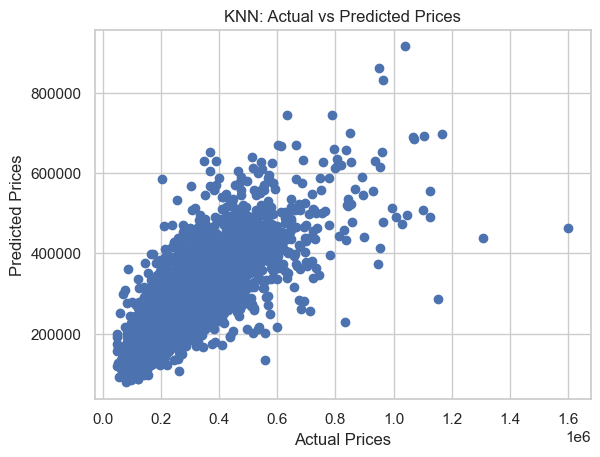

In [26]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("KNN: Actual vs Predicted Prices")
plt.show()

### **KNN Model Selection: MAE vs. K**

This analysis evaluates the effect of different K values on the performance of the KNN regression model.
Mean Absolute Error (MAE) is calculated for each K to identify the optimal number of neighbors that minimizes prediction error and avoids overfitting or underfitting.


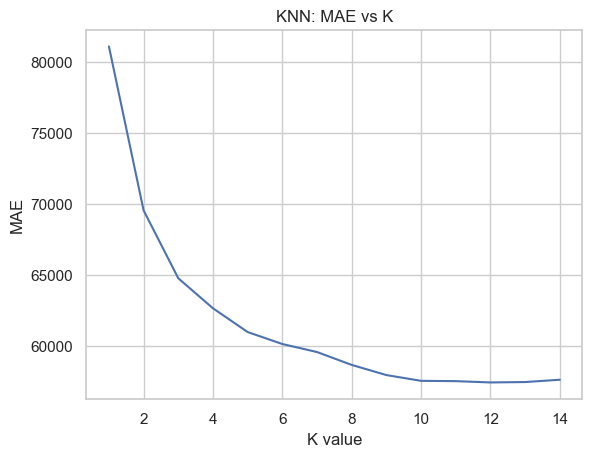

In [27]:
errors = []

for k in range(1, 15):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    errors.append(mean_absolute_error(y_test, pred))

plt.figure()
plt.plot(range(1, 15), errors)
plt.xlabel("K value")
plt.ylabel("MAE")
plt.title("KNN: MAE vs K")
plt.show()

###**Decision Tree**

In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1) X ve y
X = df.drop("price", axis=1)
y = df["price"]

# 2) Train-test split (ÖNCE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) Kategorik / sayısal sütunları güvenli seç (train üstünden)
categorical_features = X_train.select_dtypes(
    include=["object", "category", "string"]
).columns

numerical_features = X_train.columns.difference(categorical_features)

# 4) Preprocessor (kategorik one-hot, sayısal aynen geç)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numerical_features),
    ]
)

# 5) Model
dt_model = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

# 6) Pipeline
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", dt_model)
])

# 7) Train + Predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

y_pred[:10]

array([219140.64692982, 181837.59446694, 322483.41369672, 163655.87325456,
       219140.64692982, 322483.41369672, 226355.97175866, 408520.57952974,
       181837.59446694, 181837.59446694])

In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop("price", axis=1)
y = df["price"]

categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ],
    remainder="passthrough"
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt_model = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", dt_model)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


/var/folders/z5/v4jnxwv942g3tzxjmg281l6m0000gn/T/ipykernel_48582/1319712834.py:16: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_features = X.select_dtypes(include=["object"]).columns


ValueError: could not convert string to float: 'Large Area'

In [38]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)


MSE: 9180614221.026722
RMSE: 95815.52181680546
MAE: 66192.17886600067
R2 Score: 0.57566134314251


In [39]:
trained_tree = pipeline.named_steps["model"]


In [40]:
# Pipeline içindeki eğitilmiş (fitted) DecisionTreeRegressor'ı al
trained_tree = pipeline.named_steps["model"]

# Feature isimleri (OneHot sonrası)
feature_names = pipeline.named_steps["preprocessing"].get_feature_names_out()
len(feature_names), len(trained_tree.feature_importances_)

# Importances
importances = trained_tree.feature_importances_

# DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df.head(10)

,Feature,Importance
33,num__area_sqm,0.763036
10,cat__neighborhood_Umraniye,0.058779
8,cat__neighborhood_Sariyer,0.046641
29,cat__sea_view_label_No Sea View,0.040097
2,cat__neighborhood_Besiktas,0.036598
45,num__has_sea_view,0.032163
6,cat__neighborhood_Kartal,0.014003
30,cat__sea_view_label_Sea View,0.006371
31,num__age_years,0.001961
35,num__bathrooms,0.000351


In [41]:
from sklearn.tree import DecisionTreeRegressor

pruned_dt = DecisionTreeRegressor(
    max_depth=3,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

from sklearn.pipeline import Pipeline

pruned_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", pruned_dt)
])



In [42]:
pruned_pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers c

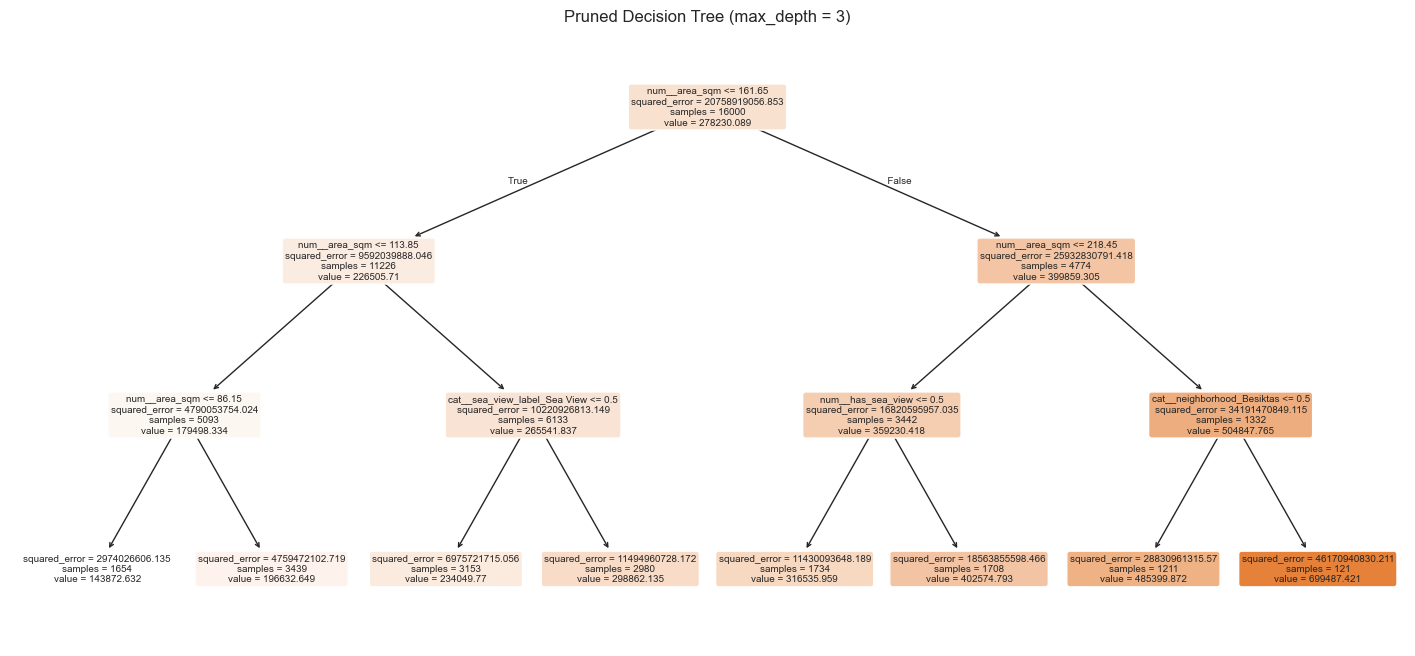

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

trained_pruned_tree = pruned_pipeline.named_steps["model"]

plt.figure(figsize=(18, 8))
plot_tree(
    trained_pruned_tree,
    feature_names=pruned_pipeline.named_steps["preprocessing"].get_feature_names_out(),
    filled=True,
    rounded=True,
    max_depth=3
)
plt.title("Pruned Decision Tree (max_depth = 3)")
plt.show()


In [44]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

print("Dummy RMSE:", np.sqrt(mean_squared_error(y_test, dummy_pred)))


Dummy RMSE: 147091.46789960994


In [45]:
depths = [2, 3, 4, 5, 6]
results = []

for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=42)
    pipeline_exp = Pipeline([
        ("preprocessing", preprocessor),
        ("model", model)
    ])

    pipeline_exp.fit(X_train, y_train)
    preds = pipeline_exp.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    results.append((d, rmse))


In [46]:
experiment_df = pd.DataFrame(results, columns=["Max Depth", "RMSE"])
experiment_df


,Max Depth,RMSE
0,2,111758.612954
1,3,105210.727037
2,4,99958.900763
3,5,95815.521817
4,6,89996.775229


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

param_grid = {
    "model__max_depth": [2, 3, 4, 5, 6],
    "model__min_samples_split": [5, 10, 20],
    "model__min_samples_leaf": [5, 10, 20],
    "model__max_features": [None, "sqrt"]
}

grid_search = GridSearchCV(
    estimator=pruned_pipeline,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
cv_results = pd.DataFrame(grid_search.cv_results_)


In [48]:
cv_results_report = cv_results[[
    "params",
    "mean_train_score",
    "mean_test_score",
    "std_test_score",
    "rank_test_score"
]].copy()

cv_results_report["Train_RMSE"] = -cv_results_report["mean_train_score"]
cv_results_report["Test_RMSE"] = -cv_results_report["mean_test_score"]


In [49]:
def regression_metrics(y_true, y_pred):
    return {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

final_results = pd.DataFrame({
    "Train": regression_metrics(y_train, best_model.predict(X_train)),
    "Test": regression_metrics(y_test, best_model.predict(X_test))
})

final_results


,Train,Test
RMSE,85864.863750,90702.724112
MAE,59727.937299,61965.445578
R2,0.644838,0.619739


In [50]:
comparison_df = pd.DataFrame({
    "Model": ["Untuned Decision Tree", "Tuned Decision Tree"],
    "Test RMSE": [
        np.sqrt(mean_squared_error(y_test, pruned_pipeline.predict(X_test))),
        np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
    ]
})

comparison_df


,Model,Test RMSE
0,Untuned Decision Tree,105210.727037
1,Tuned Decision Tree,90702.724112


In [51]:
def plot_param_effect(param_name, xlabel):
    temp = cv_results.copy()
    temp[param_name] = temp["params"].apply(lambda x: x[param_name])
    temp["RMSE"] = -temp["mean_test_score"]

    grouped = temp.groupby(param_name)["RMSE"].mean().reset_index()

    plt.figure()
    plt.plot(grouped[param_name], grouped["RMSE"], marker="o")
    plt.xlabel(xlabel)
    plt.ylabel("RMSE")
    plt.title(f"Effect of {xlabel} on RMSE")
    plt.show()


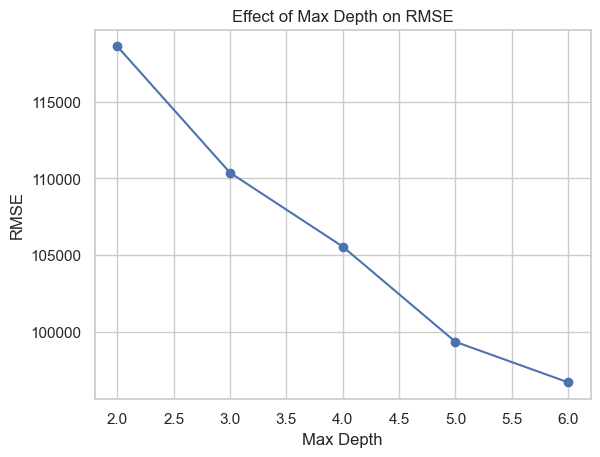

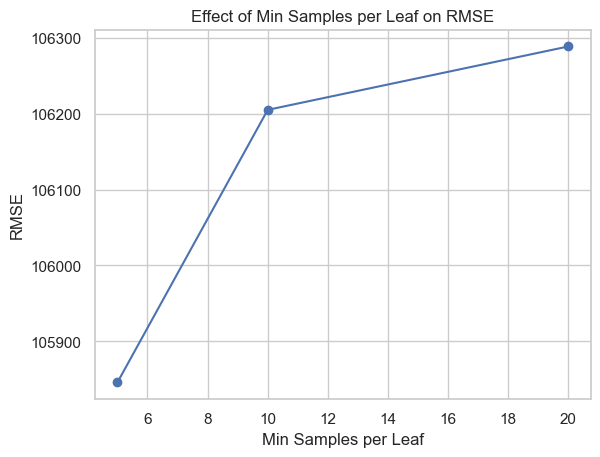

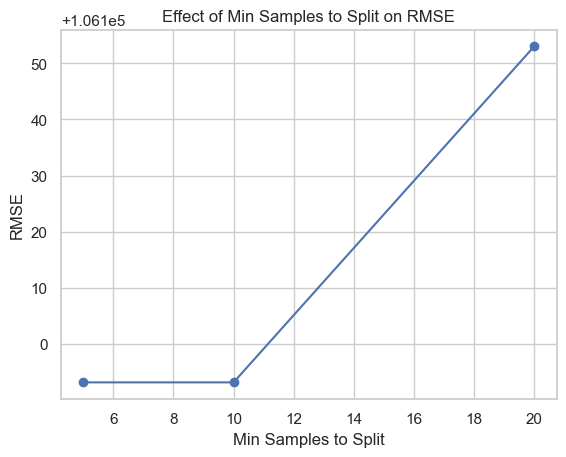

In [52]:
plot_param_effect("model__max_depth", "Max Depth")
plot_param_effect("model__min_samples_leaf", "Min Samples per Leaf")
plot_param_effect("model__min_samples_split", "Min Samples to Split")


###**Model Interpretability Analysis Using SHAP**



SHAP (SHapley Additive exPlanations) was employed to enhance model interpretability by quantifying the contribution of each feature to housing price predictions. By assigning feature-level importance values grounded in cooperative game theory, SHAP provides both global and local explanations of model behavior. This analysis enables a transparent understanding of how different property characteristics and location-related variables influence predicted prices across the evaluated models.

**Linear Regression SHAP**

For the Linear Regression model, SHAP values reflect the global linear influence of each feature, aligning closely with model coefficients and confirming the dominant impact of property size and location-related variables on price predictions.

In [54]:
import sys
!{sys.executable} -m pip install shap

  Using cached shap-0.50.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
Using cached shap-0.50.0-cp313-cp313-macosx_11_0_arm64.whl (554 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 12.8 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 52.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [shap]5/7 [numba]te]


/var/folders/z5/v4jnxwv942g3tzxjmg281l6m0000gn/T/ipykernel_48582/2801885869.py:19: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = X.select_dtypes(include=["object", "category"]).columns


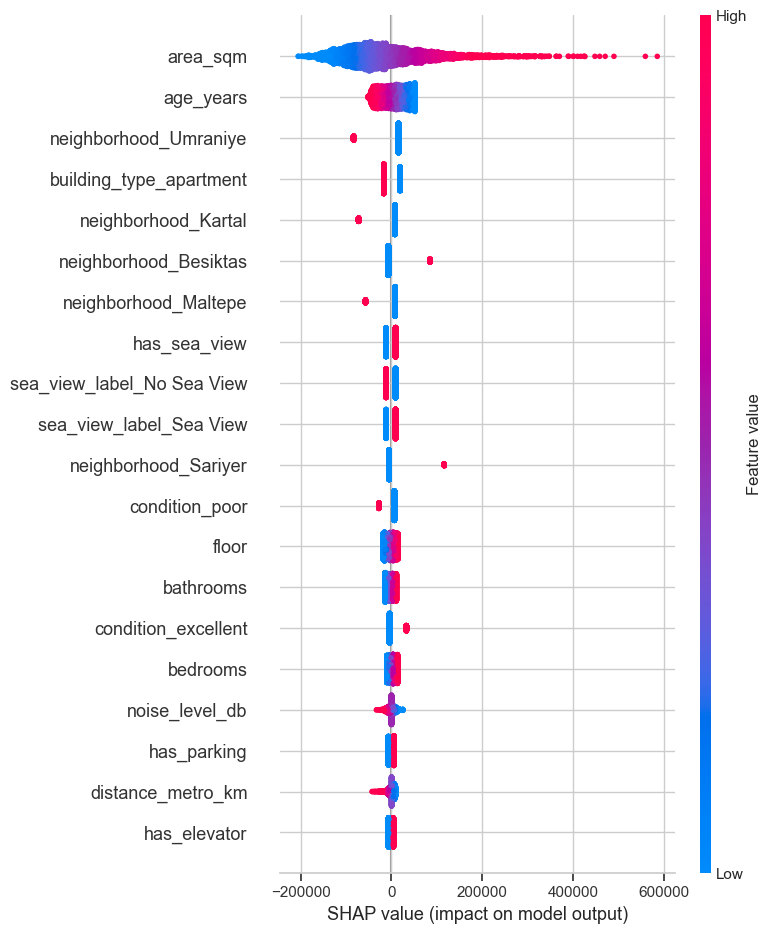

In [56]:
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression


target_col = "price"
y = df[target_col]
X = df.drop(columns=[target_col, "listing_id"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numerical_cols = X.select_dtypes(exclude=["object", "category"]).columns

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

X_train_encoded = pd.DataFrame(X_train_encoded,
                               index=X_train.index,
                               columns=encoder.get_feature_names_out(categorical_cols))

X_test_encoded = pd.DataFrame(X_test_encoded,
                              index=X_test.index,
                              columns=encoder.get_feature_names_out(categorical_cols))

X_train_final = pd.concat([X_train[numerical_cols], X_train_encoded], axis=1)
X_test_final = pd.concat([X_test[numerical_cols], X_test_encoded], axis=1)

imputer = SimpleImputer(strategy="mean")

X_train_final = pd.DataFrame(imputer.fit_transform(X_train_final),
                             columns=X_train_final.columns,
                             index=X_train_final.index)

X_test_final = pd.DataFrame(imputer.transform(X_test_final),
                            columns=X_test_final.columns,
                            index=X_test_final.index)

linear = LinearRegression()
linear.fit(X_train_final, y_train)



explainer_lr = shap.Explainer(linear, X_train_final)


shap_values_lr = explainer_lr(X_test_final)


shap.summary_plot(shap_values_lr, X_test_final)

**Decision Tree SHAP**

In the Decision Tree model, SHAP analysis highlights hierarchical and non-linear feature interactions, revealing how specific split decisions contribute to variations in housing prices.

/var/folders/z5/v4jnxwv942g3tzxjmg281l6m0000gn/T/ipykernel_48582/1376099830.py:18: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = X.select_dtypes(include=["object", "category"]).columns


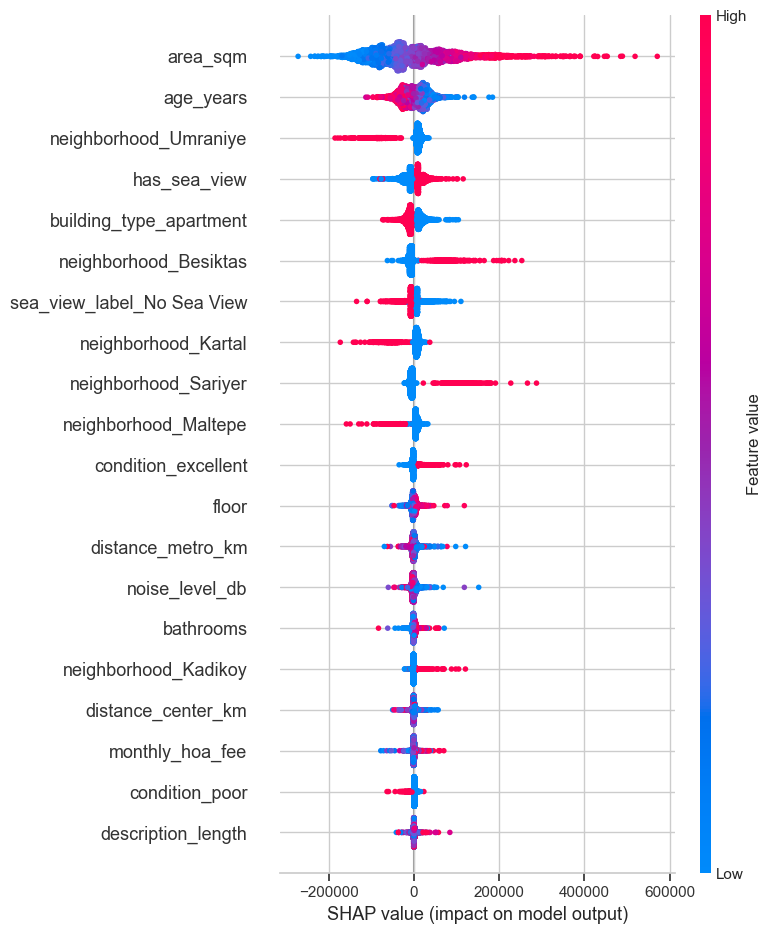

In [57]:
import shap
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


target_col = "price"
y = df[target_col]
X = df.drop(columns=[target_col, "listing_id"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numerical_cols = X.select_dtypes(exclude=["object", "category"]).columns

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

X_train_encoded = pd.DataFrame(X_train_encoded,
                               index=X_train.index,
                               columns=encoder.get_feature_names_out(categorical_cols))

X_test_encoded = pd.DataFrame(X_test_encoded,
                              index=X_test.index,
                              columns=encoder.get_feature_names_out(categorical_cols))

X_train_final = pd.concat([X_train[numerical_cols], X_train_encoded], axis=1)
X_test_final = pd.concat([X_test[numerical_cols], X_test_encoded], axis=1)

imputer = SimpleImputer(strategy="mean")

X_train_final = pd.DataFrame(imputer.fit_transform(X_train_final),
                             columns=X_train_final.columns,
                             index=X_train_final.index)

X_test_final = pd.DataFrame(imputer.transform(X_test_final),
                            columns=X_test_final.columns,
                            index=X_test_final.index)

decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train_final, y_train)

explainer_dt = shap.TreeExplainer(decision_tree_model)

shap_values_dt = explainer_dt.shap_values(X_test_final)

shap.summary_plot(shap_values_dt, X_test_final)